In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import galport
import agama

In [78]:
# Load coordinates, velocities and actions

xv_act = np.load('../data/xv_act_0.npy')

t = np.arange(0, 600.125, 0.125)
xv = xv_act[:,:,0:6]
act = xv_act[:,:,6:9]

In [53]:
# Find actions, angles and frequencies of 
# the individual orbit
num = 7

data = galport.averager.action(
    t, xv[num], act=act[num], secular=True, secular_extrema=True)

# Avaraged variables
JR = data[:,0]
Jz = data[:,1]
Lz = data[:,2]

kappa = data[:,6]
omegaz = data[:,7]
Omega = data[:,8]

# Secular variables
JR_sec = data[:,9]
Jz_sec = data[:,10]
Lz_sec = data[:,11]

kappa_sec = data[:,12]
omegaz_sec = data[:,13]
Omega_sec = data[:,14]

# Extrema
JR_max = data[:,15]
Jz_max = data[:,16]
Lz_max = data[:,17]

JR_min = data[:,21]
Jz_min = data[:,22]
Lz_min = data[:,23]

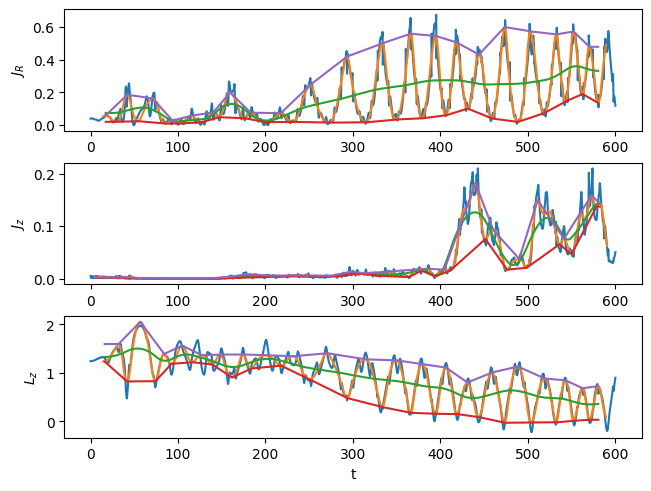

In [54]:
# Actions

fig, axes = plt.subplots(3, constrained_layout=True)

# JR
axes[0].plot(t, act[num,:,0])
axes[0].plot(t, JR)
axes[0].plot(t, JR_sec)
axes[0].plot(t, JR_max)
axes[0].plot(t, JR_min)

axes[0].set_ylabel('$J_R$')

# Jz
axes[1].plot(t, act[num,:,1])
axes[1].plot(t, Jz)
axes[1].plot(t, Jz_sec)
axes[1].plot(t, Jz_max)
axes[1].plot(t, Jz_min)

axes[1].set_ylabel('$J_z$')

# Lz
axes[2].plot(t, act[num,:,2])
axes[2].plot(t, Lz)
axes[2].plot(t, Lz_sec)
axes[2].plot(t, Lz_max)
axes[2].plot(t, Lz_min)
axes[2].set_ylabel('$L_z$')

axes[2].set_xlabel('t')

plt.show()

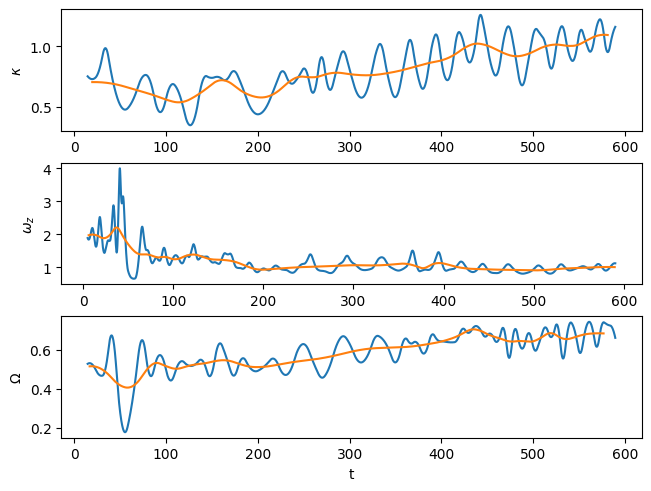

In [55]:
# Frequencies

fig, axes = plt.subplots(3, constrained_layout=True)

axes[0].plot(t, kappa)
axes[0].plot(t, kappa_sec)

axes[0].set_ylabel('$\\kappa$')


axes[1].plot(t, omegaz)
axes[1].plot(t, omegaz_sec)
axes[1].set_ylabel('$\\omega_z$')

axes[2].plot(t, Omega)
axes[2].plot(t, Omega_sec)
axes[2].set_ylabel('$\\Omega$')

axes[2].set_xlabel('t')

plt.show()

In [87]:
%%time
# Find actions, angles and frequencies of 
# the every orbit

OT = galport.OrbitTools(t=t, xv=xv, act=act)
data = OT.calculate_actions(secular=True)

CPU times: user 2.35 s, sys: 1.01 ms, total: 2.35 s
Wall time: 2.35 s


In [88]:
t = 400
n_t = int(t)*8

JR = data[:,n_t,0]
Jz = data[:,n_t,1]
Lz = data[:,n_t,2]

JR_sec = data[:,n_t,9]
Jz_sec = data[:,n_t,10]
Lz_sec = data[:,n_t,11]

kappa = data[:,n_t,6]
omegaz = data[:,n_t,7]
Omega = data[:,n_t,8]

kappa_sec = data[:,n_t,12]
omegaz_sec = data[:,n_t,13]
Omega_sec = data[:,n_t,14]

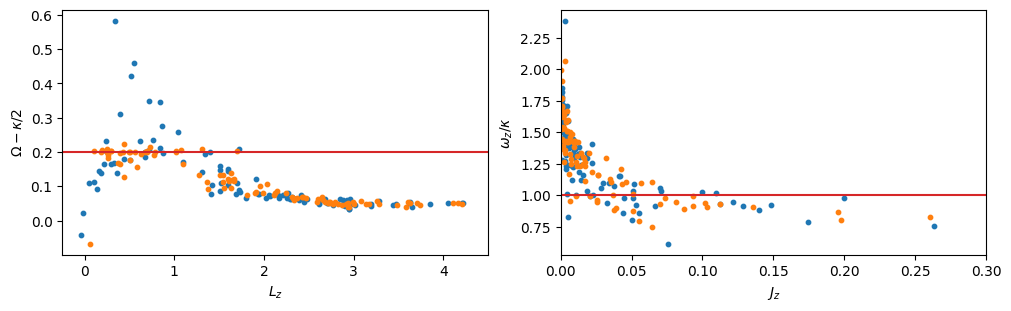

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10,3), constrained_layout=True)

axes[0].plot([-0.25, 4.5], [0.2,0.2], color='C3')
axes[0].scatter(Lz, Omega - kappa/2, s=10)
axes[0].scatter(Lz_sec, Omega_sec - kappa_sec/2, s=10)
axes[0].set_xlabel('$L_z$')
axes[0].set_ylabel('$\\Omega - \\kappa/2$')
axes[0].set_xlim(-0.25, 4.5)

axes[1].plot([0., 0.3], [1,1], color='C3')
axes[1].scatter(Jz, omegaz/kappa, s=10)
axes[1].scatter(Jz_sec, omegaz_sec/kappa_sec, s=10)
axes[1].set_xlabel('$J_z$')
axes[1].set_ylabel('$\\omega_z/\\kappa$')
axes[1].set_xlim(0, 0.3)

plt.show()

In [117]:
%%time
# Find actions, angles and frequencies of 
# the every orbit

pot_gal = agama.Potential(file='../data/Pot_non_CylSpline_t400.ini')
pot_gal_sym = agama.Potential(file='../data/Pot_axi_CylSpline_t400.ini')

Omega = np.load('../data/omega_p.npy')[400*8]
phi = -np.load('../data/theta_p.npy')[400*8]

# Rotate coordinates and velocities
xv0 = 1.*xv_act[:,400*8,0:6]
x0 = 1.*xv0[:, 0]
y0 = 1.*xv0[:, 1]
vx0 = 1.*xv0[:, 3]
vy0 = 1.*xv0[:, 4]
xv0[:, 0] = x0*np.cos(phi) - y0*np.sin(phi)
xv0[:, 1] = x0*np.sin(phi) + y0*np.cos(phi)
xv0[:, 3] = vx0*np.cos(phi) - vy0*np.sin(phi)
xv0[:, 4] = vx0*np.sin(phi) + vy0*np.cos(phi)

OT = galport.OrbitTools(
    xv0=xv0,
    Tint=100,
    Nint=1000,
    potential=pot_gal,
    axisym_potential=pot_gal_sym,
    reverse=True,
    Omega=Omega
)

data_int = OT.calculate_actions(secular=True, sidereal=True)

100 orbits complete (182.1 orbits/s)
100 orbits complete (224.2 orbits/s)


CPU times: user 32 s, sys: 12.7 ms, total: 32 s
Wall time: 2.13 s


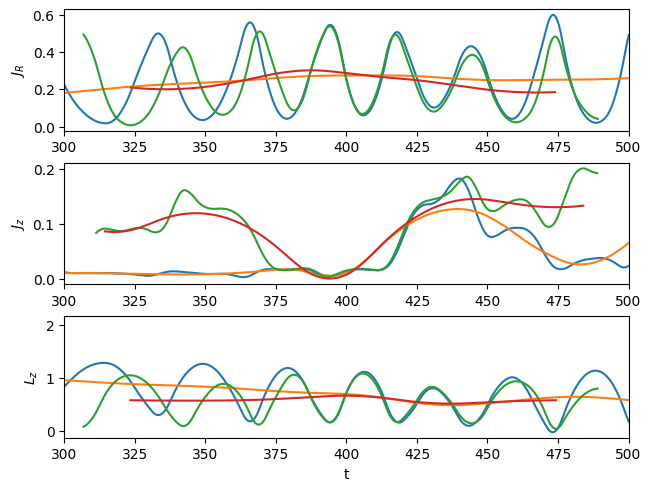

In [118]:
# Comparation actions of the individual orbit 
# Integrating vs n-body

t = np.arange(0, 600.125, 0.125)
num = 7

# Actions

fig, axes = plt.subplots(3, constrained_layout=True)

# JR
JR = data[num,:,0]
JR_sec = data[num,:,9]
axes[0].plot(t, JR)
axes[0].plot(t, JR_sec)
JR_int = data_int[num,:,0]
JR_sec_int = data_int[num,:,9]
axes[0].plot(OT.t + 400, JR_int)
axes[0].plot(OT.t + 400, JR_sec_int)

axes[0].set_ylabel('$J_R$')
axes[0].set_xlim(300,500)

# Jz
Jz = data[num,:,1]
Jz_sec = data[num,:,10]
axes[1].plot(t, Jz)
axes[1].plot(t, Jz_sec)
Jz_int = data_int[num,:,1]
Jz_sec_int = data_int[num,:,10]
axes[1].plot(OT.t + 400, Jz_int)
axes[1].plot(OT.t + 400, Jz_sec_int)

axes[1].set_ylabel('$J_z$')
axes[1].set_xlim(300,500)

# Lz
Lz = data[num,:,2]
Lz_sec = data[num,:,11]
axes[2].plot(t, Lz)
axes[2].plot(t, Lz_sec)
Lz_int = data_int[7,:,2]
Lz_sec_int = data_int[7,:,11]
axes[2].plot(OT.t + 400, Lz_int)
axes[2].plot(OT.t + 400, Lz_sec_int)

axes[2].set_ylabel('$L_z$')
axes[2].set_xlabel('t')
axes[2].set_xlim(300,500)

plt.show()

In [122]:
# Actions and frequencies at the middle of integretion time

n_t = (len(OT.t) // 2)

JR_int = data_int[:,n_t,0]
Jz_int = data_int[:,n_t,1]
Lz_int = data_int[:,n_t,2]

JR_sec_int = data_int[:,n_t,9]
Jz_sec_int = data_int[:,n_t,10]
Lz_sec_int = data_int[:,n_t,11]

kappa_int = data_int[:,n_t,6]
omegaz_int = data_int[:,n_t,7]
Omega_int = data_int[:,n_t,8]

kappa_sec_int = data_int[:,n_t,12]
omegaz_sec_int = data_int[:,n_t,13]
Omega_sec_int = data_int[:,n_t,14]

# Action and angle at the moment of time t=400

t = 400
n_t = int(t)*8

JR = data[:,n_t,0]
Jz = data[:,n_t,1]
Lz = data[:,n_t,2]

JR_sec = data[:,n_t,9]
Jz_sec = data[:,n_t,10]
Lz_sec = data[:,n_t,11]

kappa = data[:,n_t,6]
omegaz = data[:,n_t,7]
Omega = data[:,n_t,8]

kappa_sec = data[:,n_t,12]
omegaz_sec = data[:,n_t,13]
Omega_sec = data[:,n_t,14]

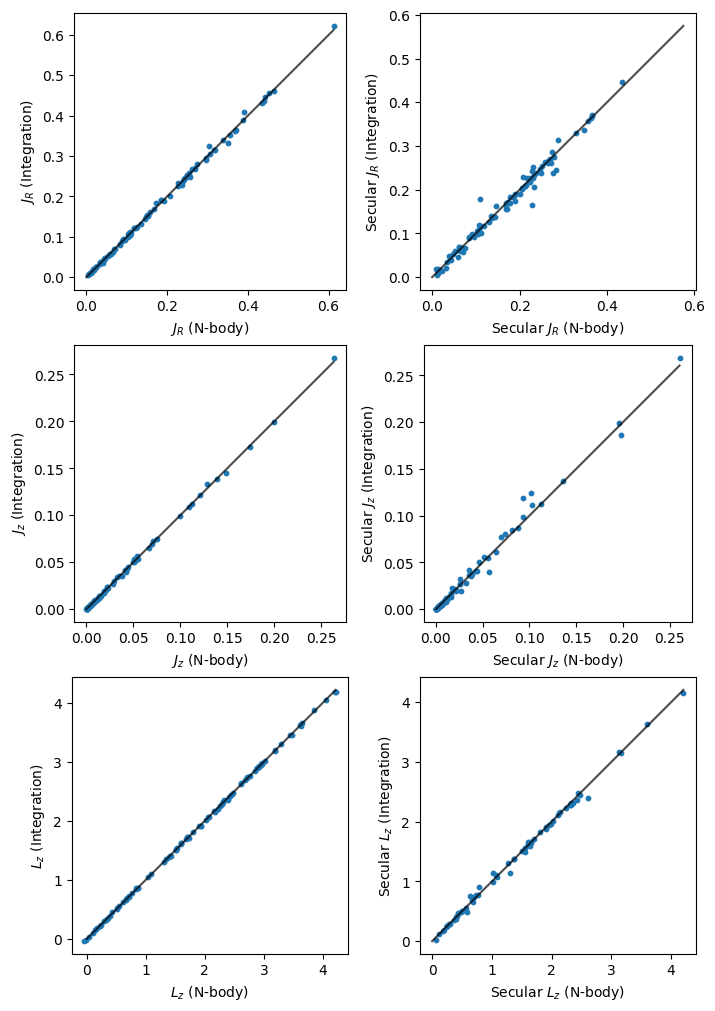

In [120]:
# Comparison actions from n-body time-series and time-series from integrating in potential

def plot_comparison(ax, x, y, x_label, y_label):
    ax.set_aspect('equal')
    ax.plot([0, np.nanmax(x)], [0.,np.nanmax(x)], color='black', alpha=0.7)
    ax.scatter(x, y, s=10)
    ax.set_xlabel(f'{x_label} (N-body)')
    ax.set_ylabel(f'{y_label} (Integration)')


    
fig, axes = plt.subplots(3, 2, figsize=(7,10), constrained_layout=True)

plot_comparison(axes[0,0], JR, JR_int, '$J_R$', '$J_R$')
plot_comparison(axes[0,1], JR_sec, JR_sec_int, 'Secular $J_R$', 'Secular $J_R$')
plot_comparison(axes[1,0], Jz, Jz_int, '$J_z$', '$J_z$')
plot_comparison(axes[1,1], Jz_sec, Jz_sec_int, 'Secular $J_z$', 'Secular $J_z$')
plot_comparison(axes[2,0], Lz, Lz_int, '$L_z$', '$L_z$')
plot_comparison(axes[2,1], Lz_sec, Lz_sec_int, 'Secular $L_z$', 'Secular $L_z$')
plt.show()

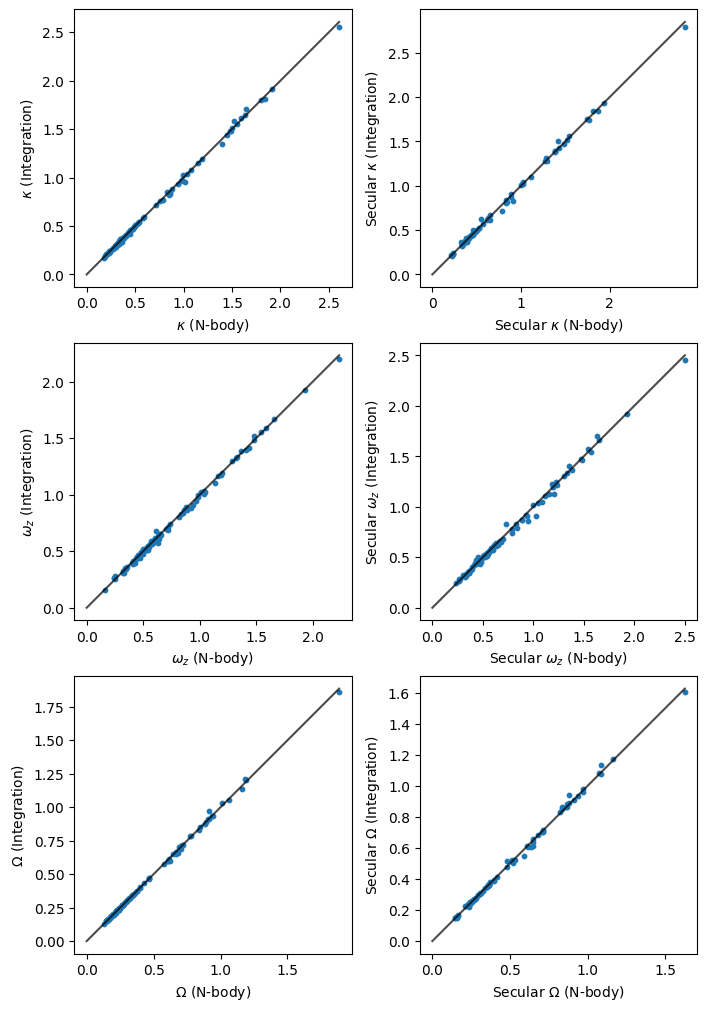

In [121]:
fig, axes = plt.subplots(3, 2, figsize=(7,10), constrained_layout=True)

plot_comparison(axes[0,0], kappa, kappa_int, '$\\kappa$', '$\\kappa$')
plot_comparison(axes[0,1], kappa_sec, kappa_sec_int, 'Secular $\\kappa$', 'Secular $\\kappa$')
plot_comparison(axes[1,0], omegaz, omegaz_int, '$\\omega_z$', '$\\omega_z$')
plot_comparison(axes[1,1], omegaz_sec, omegaz_sec_int, 'Secular $\\omega_z$', 'Secular $\\omega_z$')
plot_comparison(axes[2,0], Omega, Omega_int, '$\\Omega$', '$\\Omega$')
plot_comparison(axes[2,1], Omega_sec, Omega_sec_int, 'Secular $\\Omega$', 'Secular $\\Omega$')
plt.show()